In [1]:
# %pip install colorlog

In [2]:
import spTEP_cleaning
import rsEEG_cleaning
import mne
import os

# plt.switch_backend("TkAgg")

In [3]:
DATASET_PATH = "./dataset"
FILENAME_TEMPLATE = "TMS-EEG-H_02_S1b_{}_{}.vhdr"

Extracting parameters from ./dataset/TMS-EEG-H_02_S1b_spTEP_pre.vhdr...
Setting channel info structure...
Reading 0 ... 2696199  =      0.000 ...   539.240 secs...
Used Annotations descriptions: ['New Segment/', 'Stimulus/S  1']


[2024-05-16 17:33:30,017] - INFO - Plotting original signal


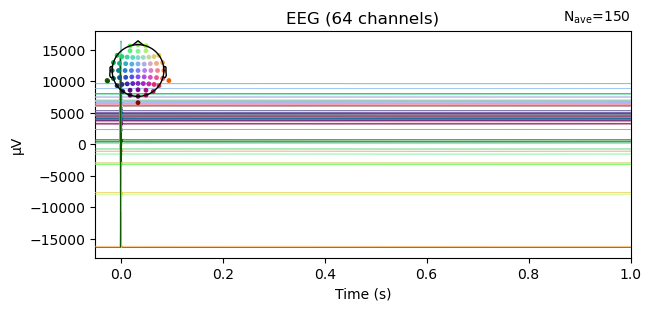

[2024-05-16 17:33:30,561] - INFO - Removing EOG channels
[2024-05-16 17:33:31,071] - INFO - Interpolating TMS pulse from 0.005 to 0.015 seconds


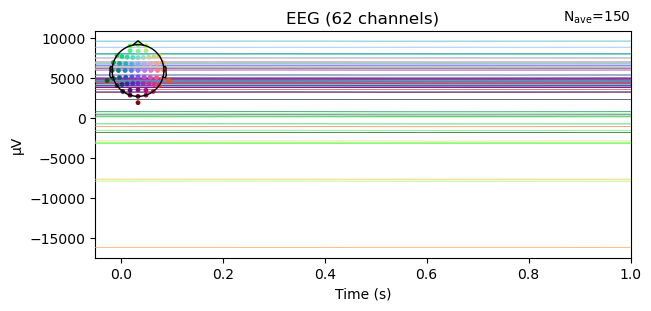

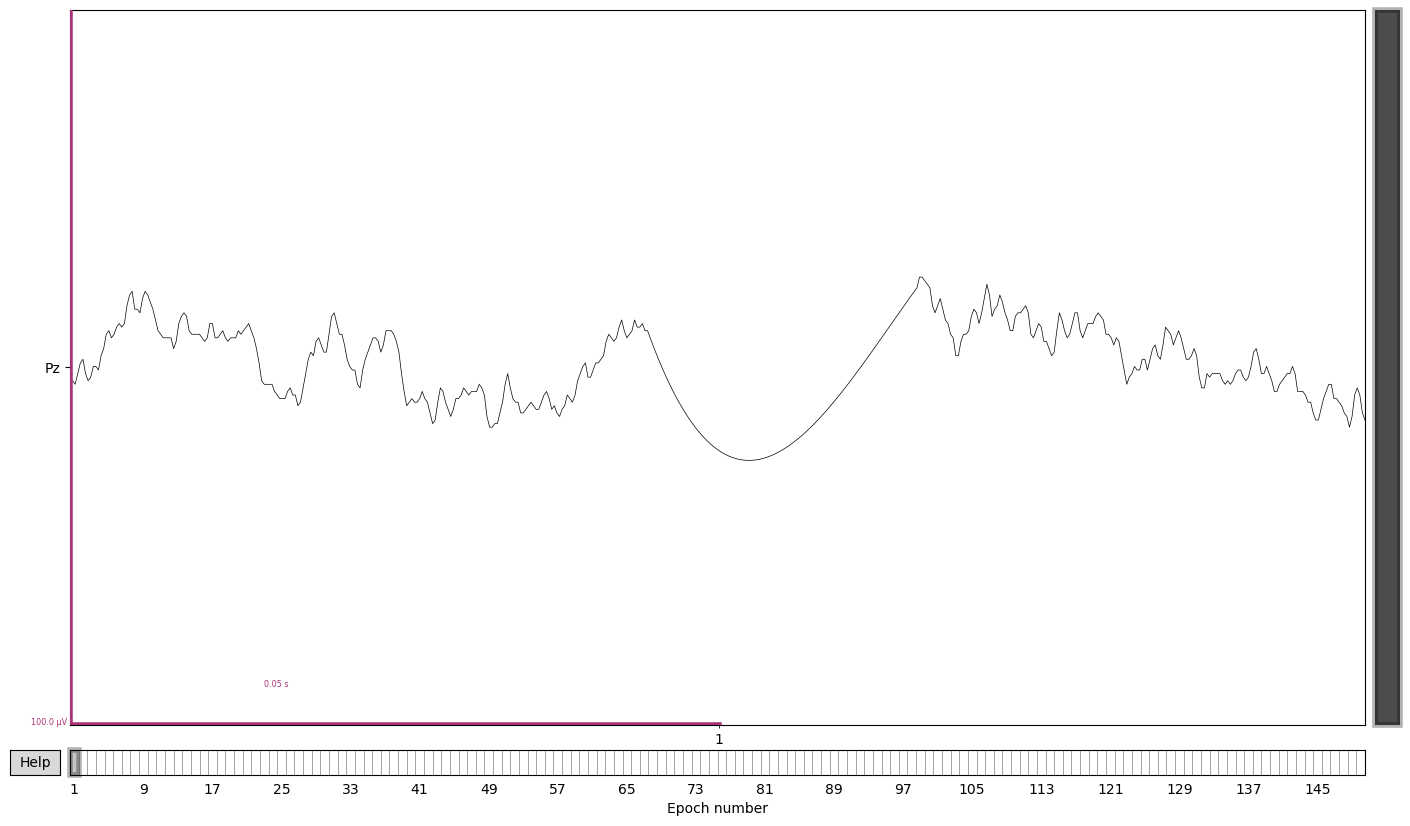

[2024-05-16 17:33:33,977] - INFO - Downsampling to 1000 Hz
[2024-05-16 17:33:53,567] - INFO - Epoching


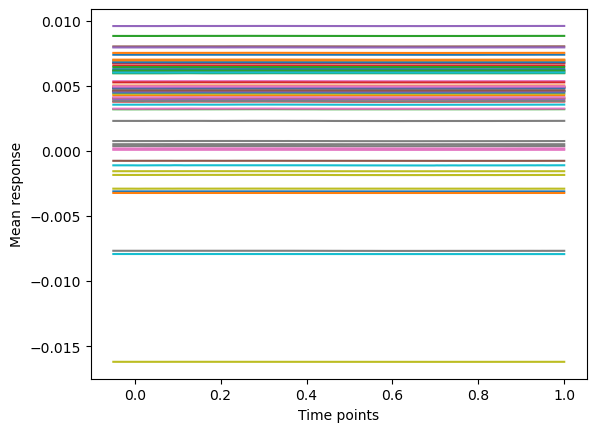

[2024-05-16 17:33:53,748] - INFO - Demeaning


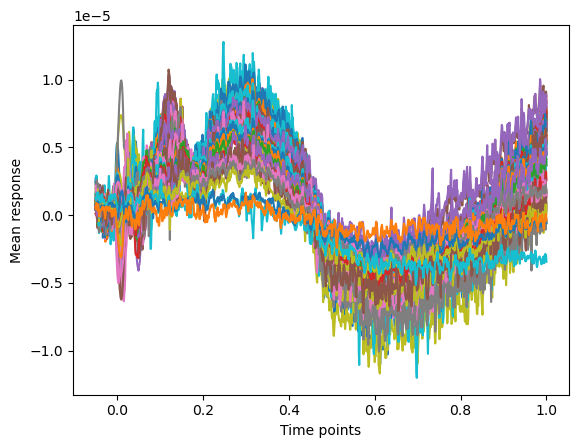

[2024-05-16 17:33:54,004] - INFO - ICA 1 from 0.011 to 0.03 seconds
/home/tomasgalle/UGent/thesis/tms-research/spTEP_cleaning.py:95: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(epoch_data)
[2024-05-16 17:34:03,417] - INFO - Excluding ICA components [8, 12]


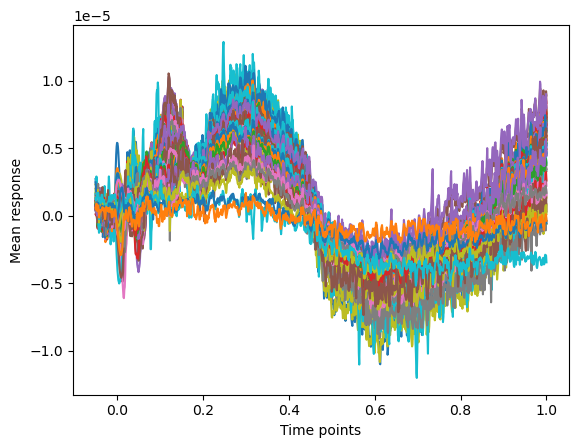

[2024-05-16 17:34:04,029] - INFO - Bandpass 1-100 Hz and notch [50] Hz
/home/tomasgalle/UGent/thesis/tms-research/spTEP_cleaning.py:125: RuntimeWarning: filter_length (3301) is longer than the signal (2001), distortion is likely. Reduce filter length or filter a longer signal.
  epoch_data.filter(low_freq, high_freq)
/home/tomasgalle/UGent/thesis/tms-research/spTEP_cleaning.py:129: RuntimeWarning: filter_length (6601) is longer than the signal (2001), distortion is likely. Reduce filter length or filter a longer signal.
  notch_filtered = mne.filter.notch_filter(


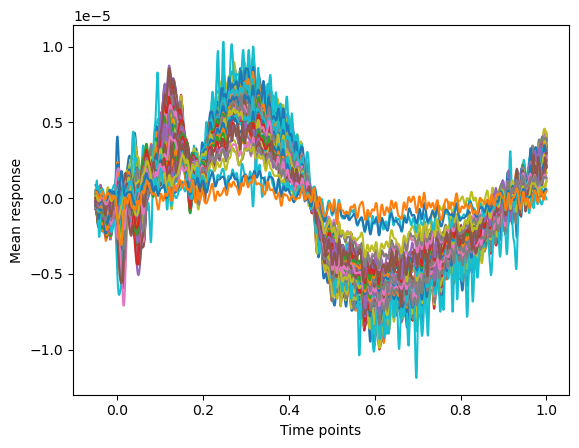

[2024-05-16 17:34:08,750] - INFO - ICA 2
/home/tomasgalle/UGent/thesis/tms-research/spTEP_cleaning.py:147: RuntimeWarning: The provided Epochs instance does not seem to be referenced to a common average reference (CAR). ICLabel was designed to classify features extracted from an EEG dataset referenced to a CAR (see the 'set_eeg_reference()' method for Raw and Epochs instances).
  ic_labels = label_components(epoch_data, ica, method="iclabel")
/home/tomasgalle/UGent/thesis/tms-research/spTEP_cleaning.py:147: RuntimeWarning: The provided ICA instance was fitted with a 'fastica' algorithm. ICLabel was designed with extended infomax ICA decompositions. To use the extended infomax algorithm, use the 'mne.preprocessing.ICA' instance with the arguments 'ICA(method='infomax', fit_params=dict(extended=True))' (scikit-learn) or 'ICA(method='picard', fit_params=dict(ortho=False, extended=True))' (python-picard).
  ic_labels = label_components(epoch_data, ica, method="iclabel")


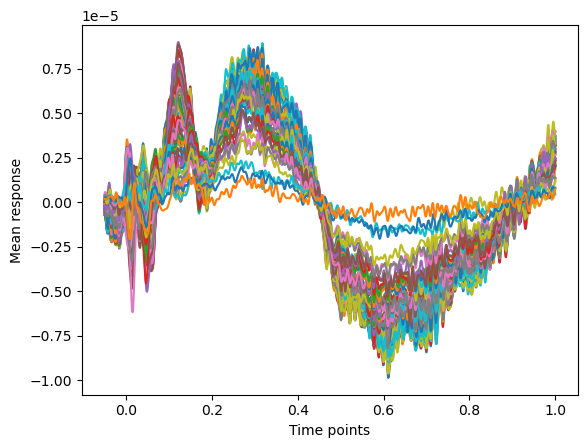

[2024-05-16 17:34:18,112] - INFO - Rereferencing to average


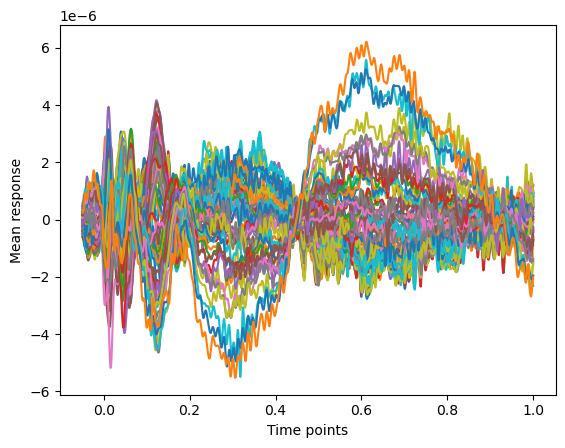

[2024-05-16 17:34:18,423] - INFO - Baseline correction from -0.5 to -0.005 s
[2024-05-16 17:34:18,456] - INFO - Plotting result


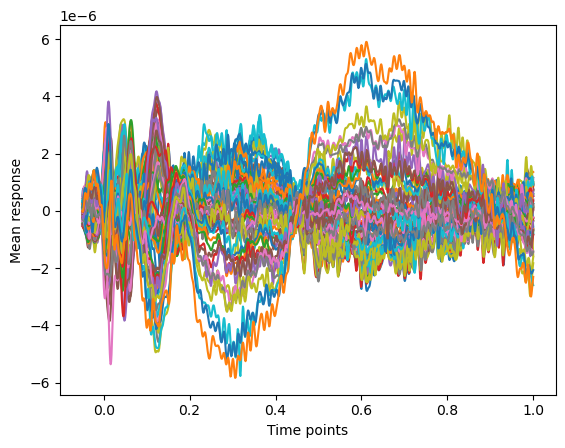

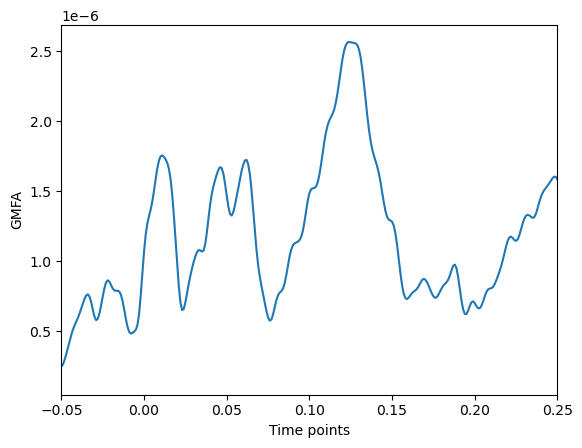

In [4]:
spTEP_filename = os.path.join(DATASET_PATH, FILENAME_TEMPLATE.format("spTEP", "pre"))

spTEP_pre_raw = mne.io.read_raw_brainvision(spTEP_filename, preload=True)
sampling_rate = spTEP_pre_raw.info["sfreq"]
events, event_dict = mne.events_from_annotations(spTEP_pre_raw)
tms_indices = [event[0] for event in events if event[2] == 1]

spTEP_cleaning.clean_spTEP(
    spTEP_filename,
    spTEP_pre_raw,
    bad_channels=["TP9"],
    plot_intermediate=True,
    plot_result=True,
    finalplot_electrodes=["F3", "FC5", "FC1"],
    finalplot_end=0.3,
)

[2024-05-16 17:34:23,959] - INFO - Removing EOG channels


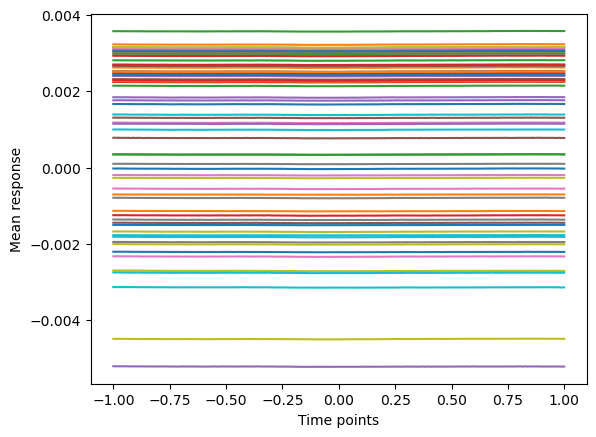

[2024-05-16 17:34:49,040] - INFO - Downsampling to 1000 Hz


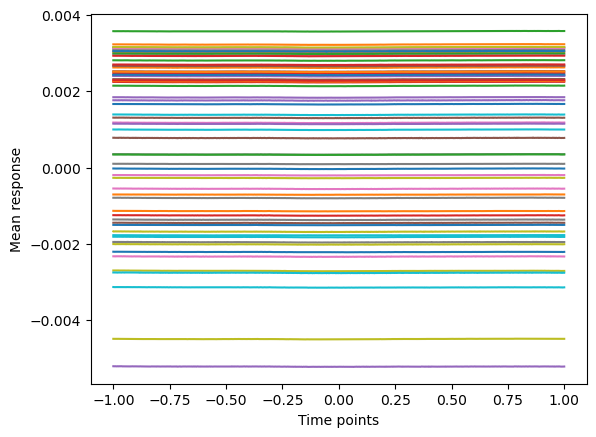

[2024-05-16 17:35:08,510] - INFO - Demeaning


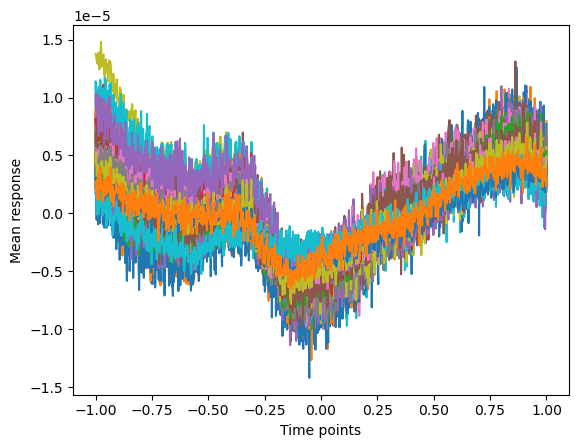

[2024-05-16 17:35:09,009] - INFO - Bandpass filtering between 1 and 100 Hz, and notch filtering at [50] Hz


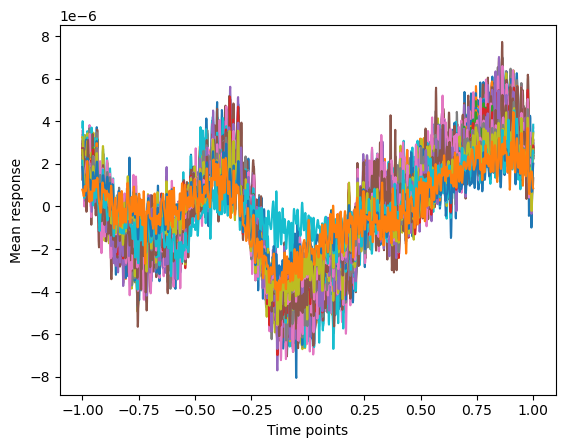

[2024-05-16 17:35:11,958] - INFO - Applying ICA
/home/tomasgalle/UGent/thesis/tms-research/rsEEG_cleaning.py:41: RuntimeWarning: The provided Raw instance does not seem to be referenced to a common average reference (CAR). ICLabel was designed to classify features extracted from an EEG dataset referenced to a CAR (see the 'set_eeg_reference()' method for Raw and Epochs instances).
  ic_labels = label_components(eeg_data, ica, method="iclabel")
/home/tomasgalle/UGent/thesis/tms-research/rsEEG_cleaning.py:41: RuntimeWarning: The provided ICA instance was fitted with a 'fastica' algorithm. ICLabel was designed with extended infomax ICA decompositions. To use the extended infomax algorithm, use the 'mne.preprocessing.ICA' instance with the arguments 'ICA(method='infomax', fit_params=dict(extended=True))' (scikit-learn) or 'ICA(method='picard', fit_params=dict(ortho=False, extended=True))' (python-picard).
  ic_labels = label_components(eeg_data, ica, method="iclabel")


Excluding ICA components: [0, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 19]


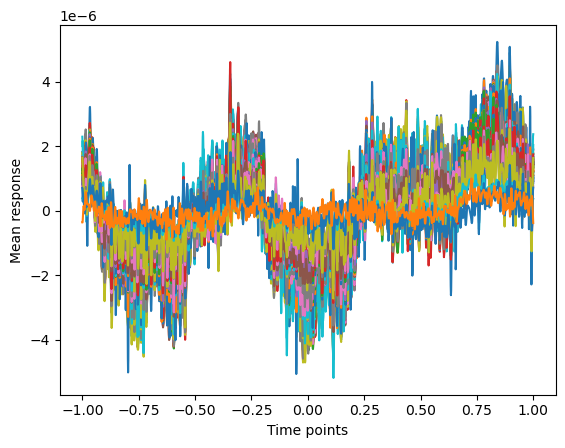

[2024-05-16 17:35:35,402] - INFO - Rereferencing to average


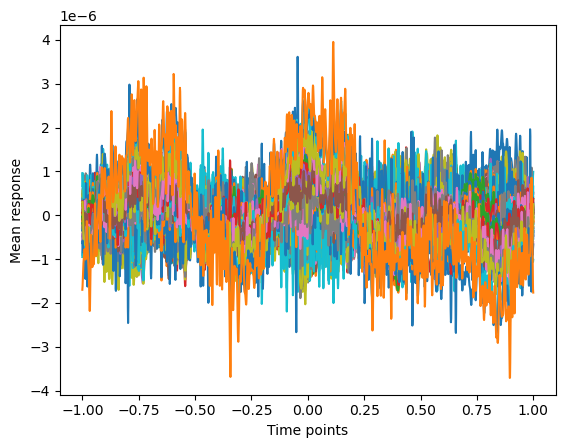

[2024-05-16 17:35:36,062] - INFO - Epoching


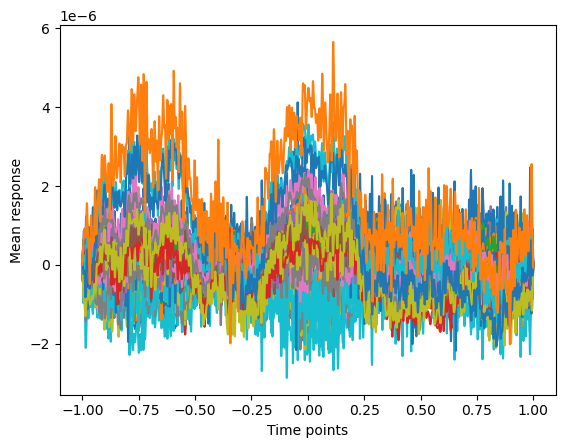

[2024-05-16 17:35:36,461] - INFO - Rejecting bad epochs


Running autoreject on ch_type=eeg




Estimated consensus=0.60 and n_interpolate=32


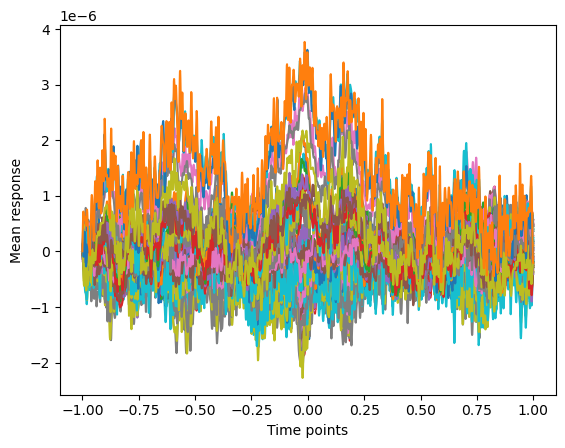

In [5]:
rsEEG_filename = os.path.join(DATASET_PATH, FILENAME_TEMPLATE.format("rsEEG", "pre"))

rsEEG_pre_raw = mne.io.read_raw_brainvision(rsEEG_filename, preload=True)

epochs = rsEEG_cleaning.clean_rsEEG(rsEEG_pre_raw, plot_intermediate=True)

In [6]:
# def process_file(file_path):
#     raw = mne.io.read_raw_brainvision(file_path, preload=True)

#     spTEP_cleaning.clean_spTEP(file_path, raw, plot_result=True, save_result=False)


# DATASET_PATH = os.path.join(".", "dataset")

# files = [
#     os.path.join(DATASET_PATH, file)
#     for file in os.listdir(DATASET_PATH)
#     if file.endswith(".vhdr") and "spTEP" in file
# ]

# with concurrent.futures.ThreadPoolExecutor() as executor:
#     futures = [executor.submit(process_file, file) for file in files]
#     for f in tqdm(concurrent.futures.as_completed(futures), total=len(futures)):
#         pass

In [7]:
# # load fif file and apply plot_full_average_epoch on the epochs object
# epochs = mne.read_epochs("filtered\TMS-EEG-H_02_S1b_spTEP_post_filtered-epo.fif")
# spTEP_cleaning.plot_full_average_epoch(epochs)